In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.adjmat = []
        
        for i in range(n):
            self.adjmat.append([0 for j in range(n)])
        
        self.g = nx.DiGraph()
        
    def addedge(self, u, v, w):
        self.adjmat[u][v] = w
        self.g.add_edge(u, v, weight=w)
        
    def visualize(self):            
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=500, alpha=0.8)
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()
        
    def visualizepath(self, path):
        edges = []
        
        for i in range(len(path)-1):
            edges.append((path[i], path[i+1]))
        
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=750, alpha=0.8)
        nx.draw_networkx_edges(self.g, pos, edgelist=edges, width=3, edge_color='g', alpha=1)
        plt.show()

In [28]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        return len(self.queue) == 0
    
    def enqueue(self, ele, pri):
        self.queue.append((ele, pri))
    
    def dequeue(self):
        if self.isEmpty():
            return None
        
        minidx = None
        minpri = None
        for i in range(len(self.queue)):
            ele, pri = self.queue[i]
            
            if minpri == None or pri < minpri:
                minidx = i
                minpri = pri
        
        ele, pri = self.queue.pop(minidx)
        
        return ele, pri
    
    def contains(self, ele):
        for e, p in self.queue:
            if ele == e:
                return p
        
        return None
    
    def replace(self, ele, pri):
        for i in range(len(self.queue)):
            e, p = self.queue[i]
            if e == ele:
                self.queue.pop(i)
                self.enqueue(ele, pri)
                return 

In [51]:
def uniformcostsearch(g, start, end):
    q = PQueue()
    q.enqueue(start, 0)
    
    visited = set()
    
    while not q.isEmpty():
        curr, cost = q.dequeue()
        
        if curr == end:
            return cost
        
        visited.add(curr)
        
        for i in range(g.n):
            if g.adjmat[curr][i] != 0:
                new_cost = cost + g.adjmat[curr][i]
                
                if i not in visited and q.contains(i) == None:
                    q.enqueue(i, new_cost)
                else:
                    prev_cost = q.contains(i)
                    
                    if prev_cost != None and prev_cost > new_cost:
                        q.replace(i, new_cost)
    
    return None

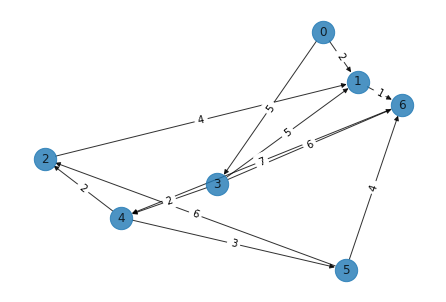

In [52]:
edges = [(0,1,2), (0,3,5), (1,6,1), (2,1,4), (3,1,5), (3,4,2), (3,6,6), (4,5,3), (4,2,2), (5,2,6), (5,6,4), (6,4,7)]

g = Graph(7)
for u, v, w in edges:
    g.addedge(u, v, w)
    
g.visualize()

In [56]:
start = 0
end = 6

mincost = uniformcostsearch(g, start, end)

if mincost != None:
    print(f"Minimum cost from {start} to {end} is {mincost}")
else:
    print(f"No path available from {start} to {end}...")

Minimum cost from 0 to 6 is 3
